<a href="https://colab.research.google.com/github/present42/PyTorchPractice/blob/main/Following_Jax_tutorial_(1)_JAX_as_acclerated_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax
import jax.numpy as jnp

x = jnp.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
x

Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

 - On CPU, 8.37 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
 - On GPU, 467 µs ± 56.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [3]:
long_vector = jnp.arange(int(1e7))

%timeit jnp.dot(long_vector, long_vector).block_until_ready()

467 µs ± 56.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
def sum_of_squares(x):
  return jnp.sum(x**2)

`jax.grad` will only work on functions with a scalar output

In [4]:
sum_of_squares_dx = jax.grad(sum_of_squares)

x = jnp.asarray([1.0, 2.0, 3.0, 4.0])

print(sum_of_squares(x))

print(sum_of_squares_dx(x))

30.0
[2. 4. 6. 8.]


By default, `jax.grad` will find the gradient with respect to the first argument.

In [6]:
def sum_squared_error(x, y):
  return jnp.sum((x - y) ** 2)

sum_squared_error_dx = jax.grad(sum_squared_error)

y = jnp.array([1.1, 2.1, 3.1, 4.1])

print(sum_squared_error_dx(x, y))

[-0.20000005 -0.19999981 -0.19999981 -0.19999981]


In [7]:
jax.grad(sum_squared_error, argnums=(0, 1))(x, y)

(Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 Array([0.20000005, 0.19999981, 0.19999981, 0.19999981], dtype=float32))

In [8]:
jax.value_and_grad(sum_squared_error)(x, y)

(Array(0.03999995, dtype=float32),
 Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32))

In [11]:
(sum_squared_error(x, y),
                                                jax.grad(sum_squared_error)(x, y))

(Array(0.03999995, dtype=float32),
 Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32))

In [13]:
def squared_error_with_aux(x, y):
  return sum_squared_error(x, y), x-y

jax.grad(squared_error_with_aux, has_aux=True)(x, y)

(Array([-0.20000005, -0.19999981, -0.19999981, -0.19999981], dtype=float32),
 Array([-0.10000002, -0.0999999 , -0.0999999 , -0.0999999 ], dtype=float32))

In [15]:
def jax_in_place_modify(x):
  return x.at[0].set(123)

y = jnp.array([1, 2, 3])
jax_in_place_modify(y)

Array([123,   2,   3], dtype=int32)

In [16]:
y

Array([1, 2, 3], dtype=int32)

Isn't the pure version less efficient? Strictly, yes; we are creating a new array. However, JAX computations are often compiled before being run using another program transformation `jax.jit`.

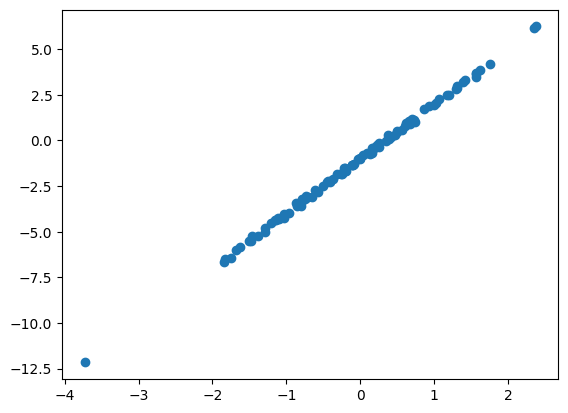

In [17]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.random.normal(size=(100,))
noise = np.random.normal(scale=0.1, size=(100,))
ys = xs * 3 - 1 + noise

plt.scatter(xs, ys)

In [18]:
# single array theta = [w, b] to house both params
def model(theta, x):
  w, b = theta
  return w * x + b

In [23]:
def loss_fn(theta, x, y):
  prediction = model(theta, x)
  return jnp.mean((prediction - y) ** 2) # MSE

In JAX, it's common to define an `update` function that is called every step, taking the current parameters as input and returning the new parameters.

In [24]:
def update(theta, x, y, lr=0.1):
  return theta - lr * jax.grad(loss_fn)(theta, x, y)

w: 2.99, b: -1.00


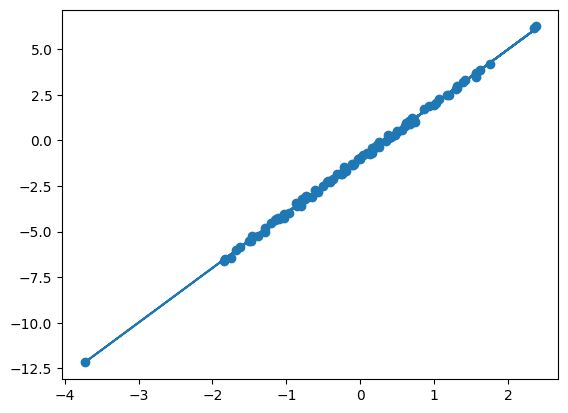

In [25]:
theta = jnp.array([1., 1.])

for _ in range(1000):
  theta = update(theta, xs, ys)

plt.scatter(xs, ys)
plt.plot(xs, model(theta, xs))

w, b = theta
print(f"w: {w: <.2f}, b: {b: <.2f}")